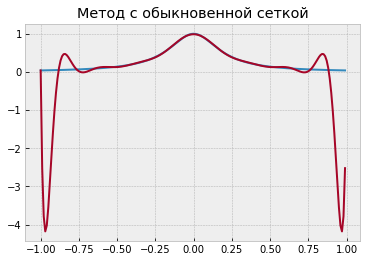

In [3]:
import math
from matplotlib import pylab as plt

'Определяем исходную функцию'

def function(x):
    return 1 / (1 + 25 * x ** 2)

'Задаём функцию Лагранжа'

def lagrange_k(k, xk, xval):
    p = 1.0
    for j in range(len(xk)):
        if(j != k):
            p *= (xval - xk[j]) / (xk[k] - xk[j])
    return p

def lagrange(xk, yk, xval):
    return sum(yk[k] * lagrange_k(k, xk, xval) for k in range(len(xk)))

'Производим интерполяцию исходной функции с помощью обычной сетки'

#Задаём обычную сетку с указанием количества точек

numpoints_com = 17

comcel_x = [(2.0 / numpoints_com * k - 1) for k in range(numpoints_com)]
comcel_y = [function(comcel_x[k]) for k in range (len(comcel_x))]

#Далее строим по ней и по функции Лагранжа непосредственно график функции

#Общее задание параметров построения графиков, которое также распространяется и на метод Чебышева
graph_x = [k * 0.01 for k in range(-100, 100)]
graph_y = [function(graph_x[k]) for k in range (len(graph_x))]

#Построение графика и сам график

plt.style.use('bmh')
plt.title('Метод с обыкновенной сеткой')

graphcom = [lagrange(comcel_x, comcel_y, k) for k in graph_x]

plt.plot(graph_x, graph_y)
plt.plot(graph_x, graphcom)
plt.show()

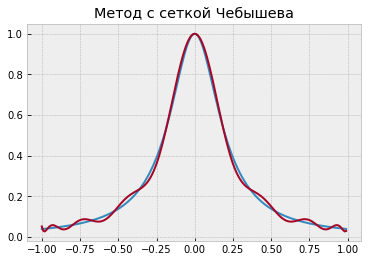

In [5]:
'Производим интерполяцию исходной функции с помощью сетки Чебышева'

#Задаём сетку Чебышева с указанием количества точек

numpoints_cheb = 17

chebcel_x = [(math.cos((2 * k + 1) / (2 * numpoints_cheb) * math.pi)) for k in range(numpoints_cheb)] 
chebcel_y = [function(chebcel_x[k]) for k in range (numpoints_cheb)]

#Построение графика и сам график

plt.style.use('bmh')
plt.title('Метод с сеткой Чебышева')

graphcheb = [lagrange(chebcel_x, chebcel_y, k) for k in graph_x]

plt.plot(graph_x, graph_y)
plt.plot(graph_x, graphcheb)
plt.show()

Вывод: Как можно видеть по двум графикам, лучше заданную функцию при одинаковом количестве точек интерполирует метод Чебышева, оптимальное количество точек для которого можно выбрать равным 12 или более. Что касается метода с обычной сеткой, тут необходимо строго подбирать количество точек для оптимального результата (экспериментально получилось 17 штук), однако в любом случае данный метод плохо справляется с исходной функцией на краях интервала (по сравнению с методом Чебышева).